In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/loan_data.csv'

data_frame = pd.read_csv(path)

display(data_frame.head())

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
data_frame.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

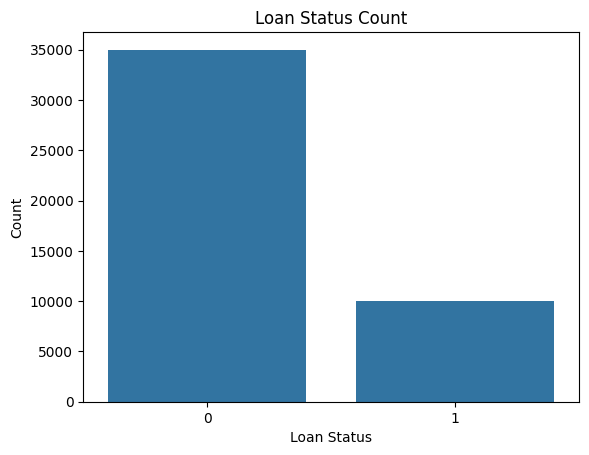

In [7]:
sns.countplot(x='loan_status', data=data_frame)
plt.title('Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [8]:
features = ['person_age', 'person_income', 'loan_amnt', 'credit_score', 'loan_status']
data_frame = data_frame[features]

data_frame.head()

,person_age,person_income,loan_amnt,credit_score,loan_status
0,22.0,71948.0,35000.0,561,1
1,21.0,12282.0,1000.0,504,0
2,25.0,12438.0,5500.0,635,1
3,23.0,79753.0,35000.0,675,1
4,24.0,66135.0,35000.0,586,1


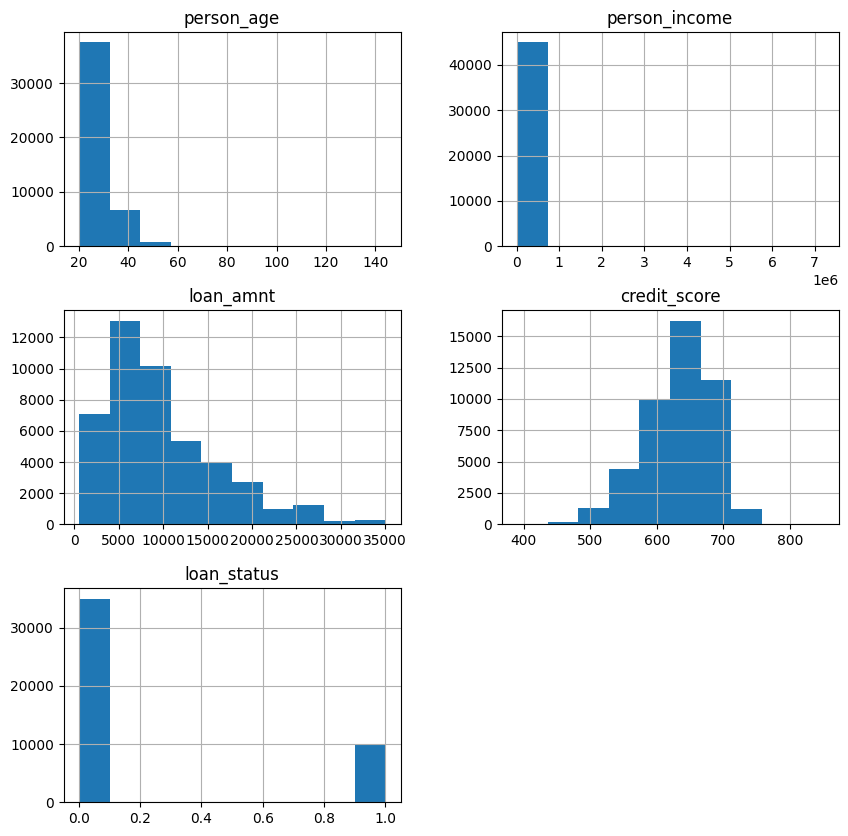

In [9]:
data_frame.hist(figsize=(10,10))
plt.show()

In [10]:
data_frame.describe()

,person_age,person_income,loan_amnt,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,9583.157556,632.608756,0.222222
std,6.045108,8.042250e+04,6314.886691,50.435865,0.415744
min,20.000000,8.000000e+03,500.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,5000.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,8000.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,12237.250000,670.000000,0.000000
max,144.000000,7.200766e+06,35000.000000,850.000000,1.000000


In [11]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   person_age     45000 non-null  float64
 1   person_income  45000 non-null  float64
 2   loan_amnt      45000 non-null  float64
 3   credit_score   45000 non-null  int64  
 4   loan_status    45000 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.7 MB


In [14]:
from sklearn.model_selection import train_test_split

X = data_frame.drop('loan_status', axis=1)
y = data_frame['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.8173333333333334
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6990
           1       0.67      0.36      0.47      2010

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



<Axes: >

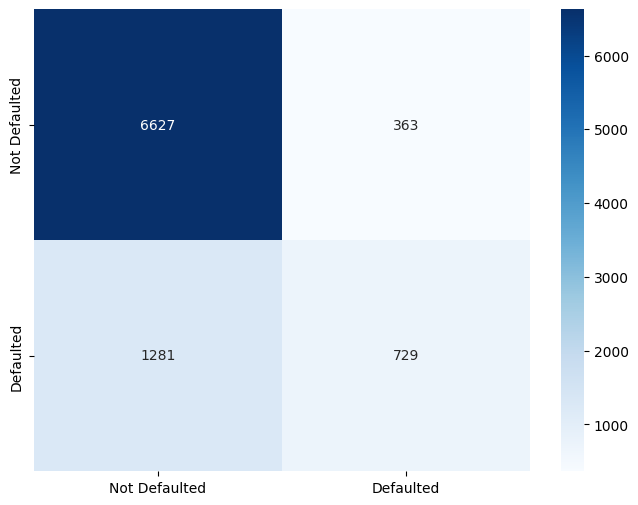

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model = DecisionTreeClassifier(criterion='gini',  max_depth= 3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Defaulted', 'Defaulted'], yticklabels=['Not Defaulted', 'Defaulted'])

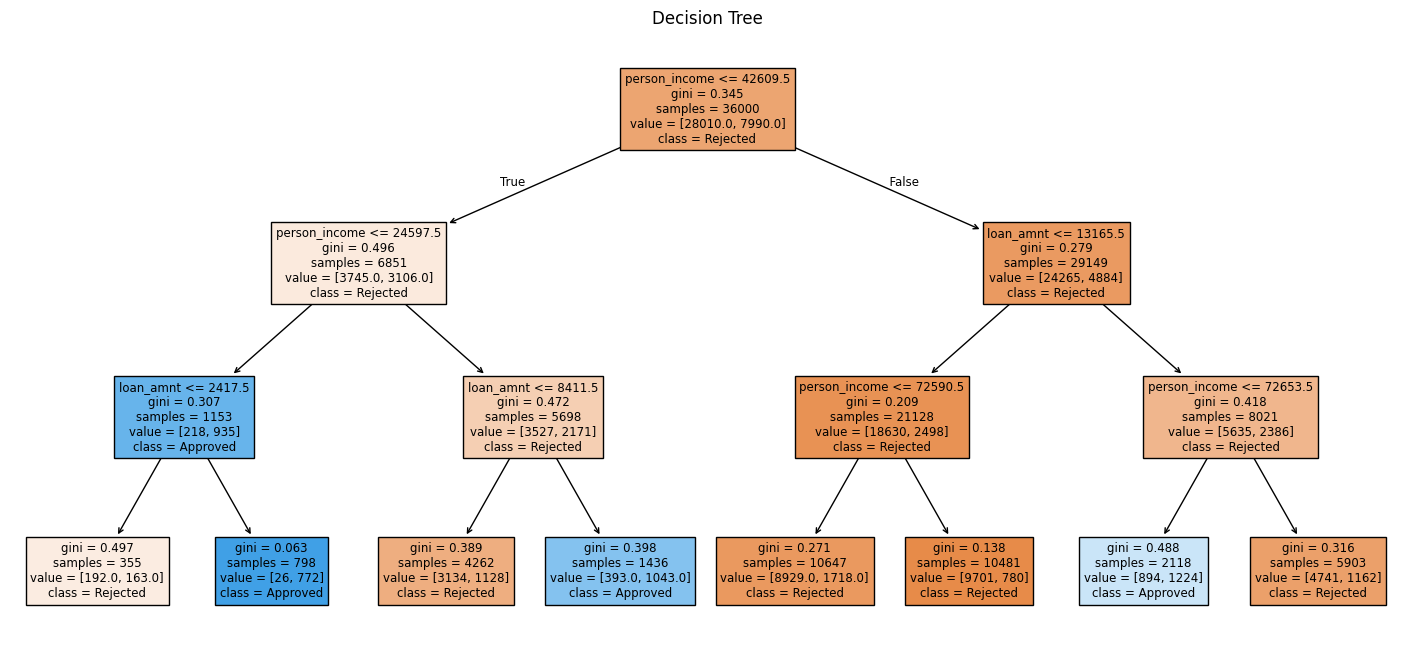

In [25]:
plt.figure(figsize=(18, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Rejected', 'Approved'])
plt.title('Decision Tree')
plt.show()